<a href="https://colab.research.google.com/github/brunasil98/Colab_Semiconductor/blob/main/Test_3_192_DO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
import tensorflow.keras.utils as conv_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
#from keras import backend as K
####################################################
import os
import cv2

from PIL import Image
import numpy as np

In [5]:
image_directory = r'drive/MyDrive/Youtube_Neural_Network/'
SIZE = 192
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

Error = os.listdir(image_directory + 'Error/')
for i, image_name in enumerate(Error):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread (image_directory + 'Error/' + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
Non_error = os.listdir(image_directory + 'Non_error/')
for i, image_name in enumerate(Non_error):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Non_error/' + image_name,cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 25)

In [8]:
X_train = np.array(X_train)
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],1)
y_train = np.array(y_train)
y_train = y_train.reshape(len(y_train),1)
X_test = np.array(X_test)
X_test = X_test.reshape(len(X_test),X_test.shape[1],X_test.shape[2],1)
y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test),1)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2150, 192, 192, 1)
(2150, 1)
(538, 192, 192, 1)
(538, 1)


In [10]:

X_train = conv_utils.normalize(X_train)
X_test = conv_utils.normalize(X_test)

In [11]:
INPUT_SHAPE = (SIZE, SIZE, 1)   #change to (SIZE, SIZE, 1)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())


model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())




model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.add(BatchNormalization()) 

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['acc'])

print(model.summary())    
###############################################################  


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 190, 190, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 95, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 95, 95, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 93, 93, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 93, 93, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2150, 192, 192, 1)
(2150, 1)
(538, 192, 192, 1)
(538, 1)


In [14]:
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 1000,      
                         validation_split= 0.2,
                         shuffle = True
                     )




Epoch 1/1000
27/27 [==============================] - 35s 73ms/step - loss: 5.5741 - acc: 0.5404 - val_loss: 0.8287 - val_acc: 0.4093
Epoch 2/1000
27/27 [==============================] - 1s 27ms/step - loss: 5.1671 - acc: 0.5464 - val_loss: 0.7501 - val_acc: 0.5907
Epoch 3/1000
27/27 [==============================] - 1s 27ms/step - loss: 4.6093 - acc: 0.5245 - val_loss: 1.6591 - val_acc: 0.4093
Epoch 4/1000
27/27 [==============================] - 1s 27ms/step - loss: 4.2942 - acc: 0.5557 - val_loss: 0.6925 - val_acc: 0.5651
Epoch 5/1000
27/27 [==============================] - 1s 27ms/step - loss: 3.2537 - acc: 0.5748 - val_loss: 0.6998 - val_acc: 0.5860
Epoch 6/1000
27/27 [==============================] - 1s 27ms/step - loss: 3.0659 - acc: 0.6096 - val_loss: 7.9670 - val_acc: 0.4093
Epoch 7/1000
27/27 [==============================] - 1s 27ms/step - loss: 2.5013 - acc: 0.6406 - val_loss: 0.7298 - val_acc: 0.5047
Epoch 8/1000
27/27 [==============================] - 1s 27ms/step -

In [15]:
model.save('semiconductor_model3_194_1000_OD2.h5')  

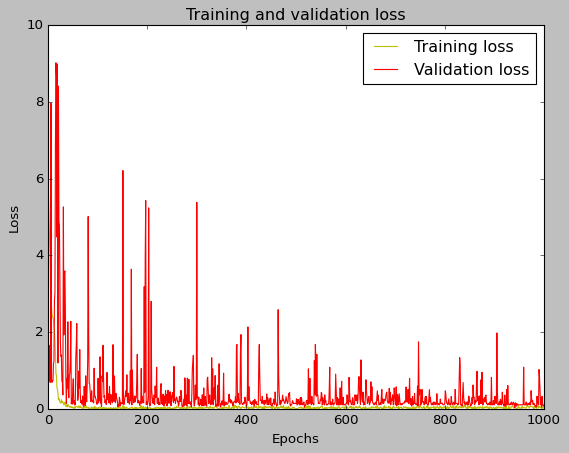

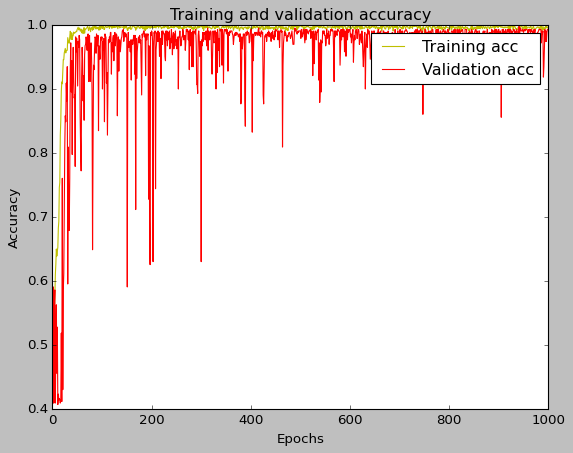

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

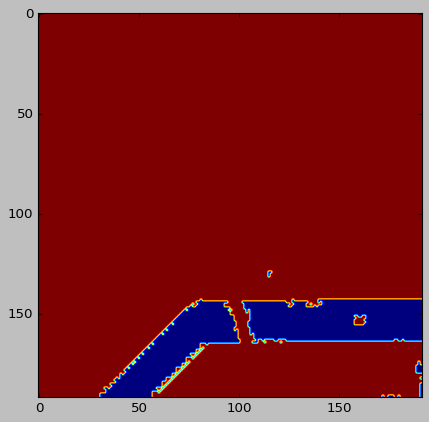

In [17]:
n=23  #Select the index of image to be loaded for testing
#Image_Non_Error 440000062 = number 23
#Image_Error 440000036 = number 10

img = X_test[n]
plt.imshow(tf.squeeze(img) )

In [18]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

The prediction for this image is:  [[1.6996131]]
The actual label for this image is:  [1]


In [19]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
import seaborn as sns


In [20]:
model = load_model('semiconductor_model3_194_1000_OD2.h5')

In [21]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

17/17 [==============================] - 1s 10ms/step - loss: 0.2132 - acc: 0.9814
Accuracy =  98.14126491546631 %


In [22]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
print("RMS: %r " % np.sqrt(np.mean((y_pred - y_test) ** 2)))

RMS: 0.13633547078730296 


In [24]:
 print(accuracy_score( y_test, y_pred))

0.9814126394052045


In [25]:
print(np.mean(y_test==y_pred))

0.9814126394052045


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[229,   2],
       [  8, 299]])

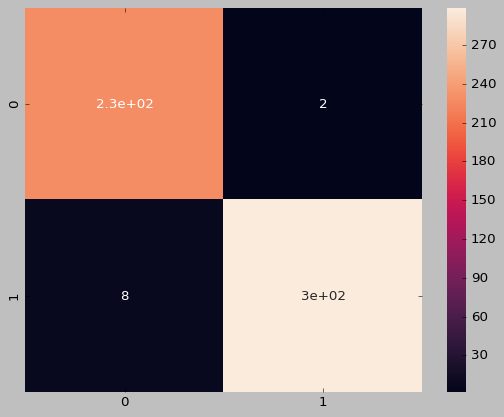

In [27]:
f = sns.heatmap(cm, annot=True)